In [39]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [31]:
fid = pd.read_csv('../../RBC_fid_table.csv')
fid['FileName'][24] = 'ACTTGA-s_7_1_t8'

/Users/Yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
f1 = pd.read_csv('coding/shift15_geneTXCD_RPKMoutput_ATCACG-s_5_1_shift15.txt',sep='\t',na_values='-')
f2 = pd.read_csv('coding/shift15_geneTXCD_RPKMoutput_ACAGTG-s_5_1_shift15.txt',sep='\t',na_values='-')

In [33]:
f1.head()

,AccNum,txReads,txRPKM,cdReads,cdRPKM
0,NM_001003806,24.0,1.592167,9.0,1.824951
1,NM_017847,291.0,5.088877,197.0,9.832896
2,NM_001143986,2.0,0.067860,2.0,0.079269
3,NM_001143987,0.0,NaN,0.0,NaN
4,NM_001143980,0.0,NaN,0.0,NaN


In [87]:
def plotScatter(f1,f2,outBatch,save=True):
    x = np.log2(f1.cdRPKM)
    y = np.log2(f2.cdRPKM)
    mask = ~np.isnan(x) & ~np.isnan(y)
    x=x[mask]
    y=y[mask]
    sns.set_style("white")
    plt.figure(figsize=(5,5))
    ax = sns.scatterplot(x=x,y=y)
    maxsize = max(max(x),max(y))
    minsize = min(min(x),min(y))
    X_plot = np.linspace(minsize, maxsize, 10)
    Y_plot = X_plot
    print(X_plot,Y_plot)
    plt.plot(X_plot, Y_plot, color='r')
    ax.set_xlabel('log2(cdRPKM) set 8')
    ax.set_ylabel('log2(cdRPKM) set 9')
    ax.set_title(outBatch)

    linreg = scipy.stats.linregress(x,y)
    plt.text(0.15,0.95, 'r2 = '+'%0.6f' % linreg.rvalue,
             horizontalalignment='center',
             verticalalignment='center',
             transform = ax.transAxes)
    
    fig = ax.get_figure()
    if save:
        fig.savefig(outBatch+'.eps')    

[-6.97304635 -4.22149416 -1.46994198  1.2816102   4.03316238  6.78471456
  9.53626675 12.28781893 15.03937111 17.79092329] [-6.97304635 -4.22149416 -1.46994198  1.2816102   4.03316238  6.78471456
  9.53626675 12.28781893 15.03937111 17.79092329]


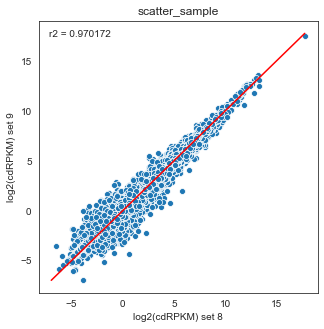

In [89]:
plotScatter(f1,f2,'scatter_sample',save=False)


In [76]:
linreg.rvalue

0.9766174662872217

In [77]:
# for i in range(30): #set8
#     sets = fid['Sets'][i]
#     if sets==9: 
#         continue
#     types = fid['Types'][i]
#     t = fid['Timepoint'][i]
#     for j in range()
# so ugly

In [78]:
fid_sorted = fid.sort_values(by=['Types','Timepoint','Sets'],ignore_index=True)
fid_sorted

,Barcodes,Sets,Types,Timepoint,Position,FileName
0,CGATGT,8,L24,0,CGATGT,CGATGT-s_6_1
1,GATCAG,9,L24,0,GATCAG,GATCAG-s_6_1
2,TGACCA,8,L24,1,TGACCA,TGACCA-s_6_1
3,TAGCTT,9,L24,1,TAGCTT,TAGCTT-s_6_1
4,ACTTGA,8,L24,2,ACTTGA,ACTTGA-s_6_1
5,GGCTAC,9,L24,2,GGCTAC,GGCTAC-s_6_1
6,ATCACG,8,RNA,0,ATCACG,ATCACG-s_8_1
7,TGACCA,9,RNA,0,TGACCA,TGACCA-s_8_1
8,TTAGGC,8,RNA,1,TTAGGC,TTAGGC-s_8_1
9,GCCAAT,9,RNA,1,GCCAAT,GCCAAT-s_8_1


[-8.41511524 -5.94507482 -3.4750344  -1.00499398  1.46504644  3.93508686
  6.40512728  8.87516769 11.34520811 13.81524853] [-8.41511524 -5.94507482 -3.4750344  -1.00499398  1.46504644  3.93508686
  6.40512728  8.87516769 11.34520811 13.81524853]
[-8.91810988 -6.22332189 -3.5285339  -0.83374591  1.86104208  4.55583007
  7.25061806  9.94540605 12.64019404 15.33498203] [-8.91810988 -6.22332189 -3.5285339  -0.83374591  1.86104208  4.55583007
  7.25061806  9.94540605 12.64019404 15.33498203]
[-7.05668374 -4.2560234  -1.45536305  1.34529729  4.14595763  6.94661797
  9.74727831 12.54793865 15.34859899 18.14925933] [-7.05668374 -4.2560234  -1.45536305  1.34529729  4.14595763  6.94661797
  9.74727831 12.54793865 15.34859899 18.14925933]
[-7.53951961 -5.37546691 -3.2114142  -1.0473615   1.11669121  3.28074391
  5.44479662  7.60884932  9.77290203 11.93695473] [-7.53951961 -5.37546691 -3.2114142  -1.0473615   1.11669121  3.28074391
  5.44479662  7.60884932  9.77290203 11.93695473]
[-8.71707136 -6.

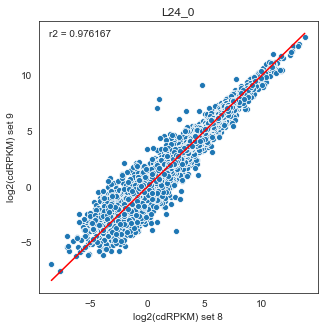

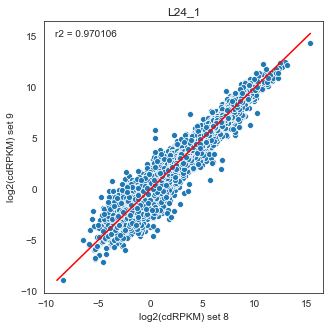

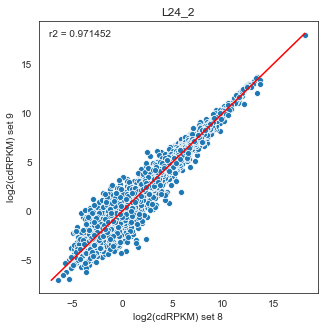

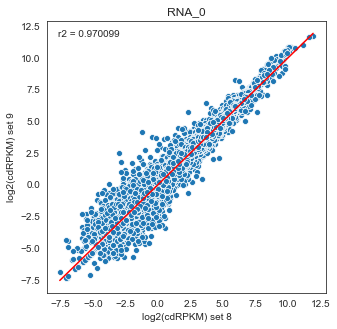

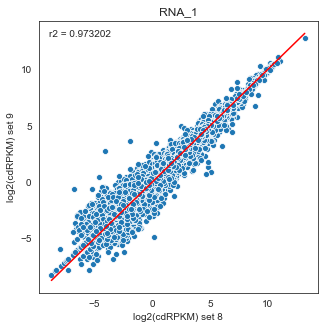

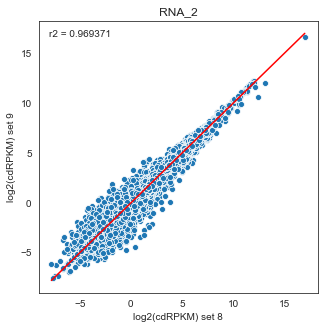

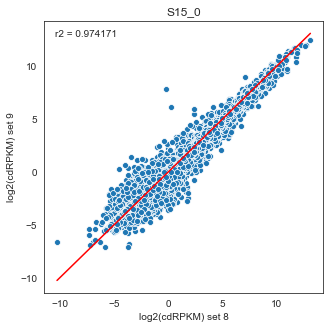

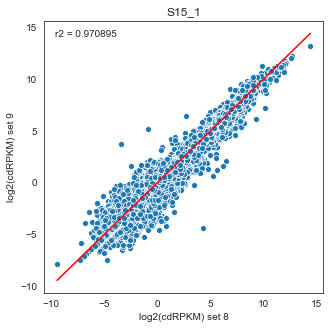

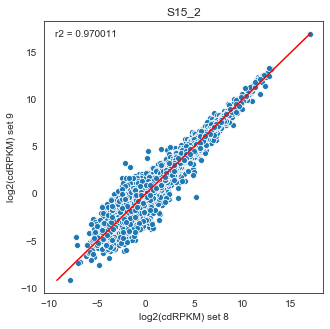

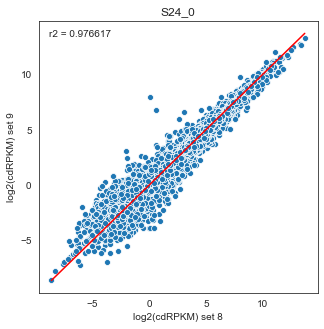

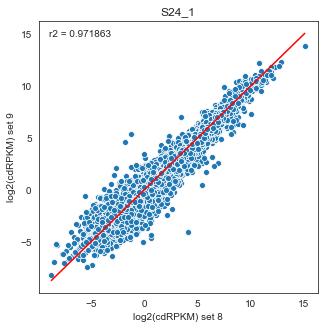

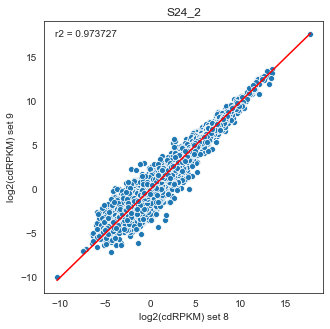

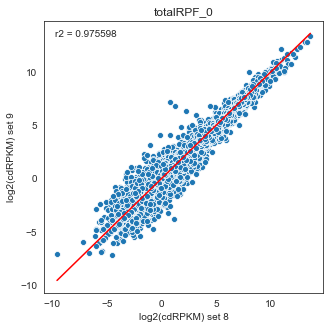

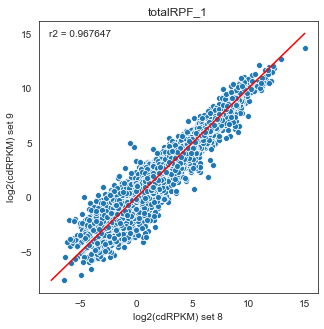

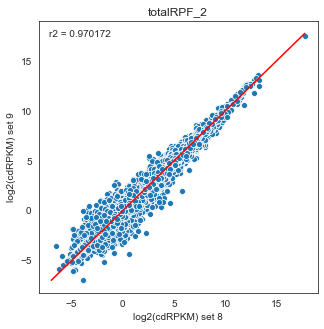

In [90]:
for i in range(0,30,2):
    f1 = pd.read_csv('coding/shift15_geneTXCD_RPKMoutput_'+fid_sorted['FileName'][i]+'_shift15.txt',sep='\t',na_values='-') #set8
    f2 = pd.read_csv('coding/shift15_geneTXCD_RPKMoutput_'+fid_sorted['FileName'][i+1]+'_shift15.txt',sep='\t',na_values='-') #set9
    assert (fid_sorted['Timepoint'][i]==fid_sorted['Timepoint'][i+1])
    assert (fid_sorted['Types'][i]==fid_sorted['Types'][i+1])
    outBatch = fid_sorted['Types'][i]+'_'+str(fid_sorted['Timepoint'][i])
    plotScatter(f1,f2,outBatch)

In [13]:
outBatch

'totalRPF2'